In [1]:
import sys
sys.path.append('../../code')

In [2]:
import convml_tt

from pathlib import Path

from fastai.basic_train import load_learner

In [3]:
data_path = Path('../../data/storage')
(data_path/"tiles"/"goes16").ls()

[PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N10000'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N10000_set2'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N1000study_N10000train'),
 PosixPath('../../data/storage/tiles/goes16/set1'),
 PosixPath('../../data/storage/tiles/goes16/set2'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N500study_N2000train'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N0study_N10train'),
 PosixPath('../../data/storage/tiles/goes16/models')]

In [4]:
tileset_path = data_path/"tiles"/"goes16"/"Nx256_s200000.0_N500study_N2000train"
tile_path = tileset_path/"study"
models_path = tileset_path/"train"/"models"
models_path.ls()

[PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N500study_N2000train/train/models/stage-1.pkl'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N500study_N2000train/train/models/tmp.pth'),
 PosixPath('../../data/storage/tiles/goes16/Nx256_s200000.0_N500study_N2000train/train/models/models')]

In [5]:
model = load_learner(models_path, "stage-1.pkl")

/nfs/see-fs-02_users/earlcd/datastore/a289/anaconda2/envs/satdata2/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'torchvision.models.resnet.BasicBlock' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)
/nfs/see-fs-02_users/earlcd/datastore/a289/anaconda2/envs/satdata2/lib/python3.7/site-packages/torch/serialization.py:435: SourceChangeWarning: source code of class 'fastai.layers.AdaptiveConcatPool2d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


In [6]:
triplets = convml_tt.NPMultiImageList.from_folder(tile_path)
triplets

NPMultiImageList (500 items)
[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)],[Image (3, 256, 256), Image (3, 256, 256), Image (3, 256, 256)]
Path: ../../data/storage/tiles/goes16/Nx256_s200000.0_N500study_N2000train/study

In [7]:
encodings = convml_tt.get_encodings(triplets, model)

100%|██████████| 500/500 [00:47<00:00,  9.61it/s]


In [8]:
encodings

<xarray.DataArray (tile_id: 500, enc_dim: 100)>
array([[-0.057738,  0.034694,  0.037043, ...,  0.021907,  0.068567, -0.05971 ],
       [-0.045319,  0.017288,  0.187497, ...,  0.074235,  0.093561,  0.025728],
       [ 0.143855, -0.148752, -0.26558 , ..., -0.127735, -0.190605, -0.023842],
       ...,
       [ 0.085761, -0.155954, -0.198646, ..., -0.0581  , -0.084231,  0.017921],
       [ 0.10804 , -0.16091 , -0.213996, ..., -0.089401, -0.108375,  0.04414 ],
       [ 0.104399, -0.143942, -0.224941, ..., -0.084925, -0.124455, -0.006198]],
      dtype=float32)
Coordinates:
  * tile_id  (tile_id) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
  * enc_dim  (enc_dim) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Attributes:
    tile_used:    anchor
    source_path:  /nfs/a289/earlcd/OneDrive/ML/research/convective_organisati...

In [9]:
encodings.to_netcdf('encodings_example.nc')

# dendrogram

In [10]:
import xarray as xr

In [11]:
encodings = xr.open_dataarray('encodings_example.nc')

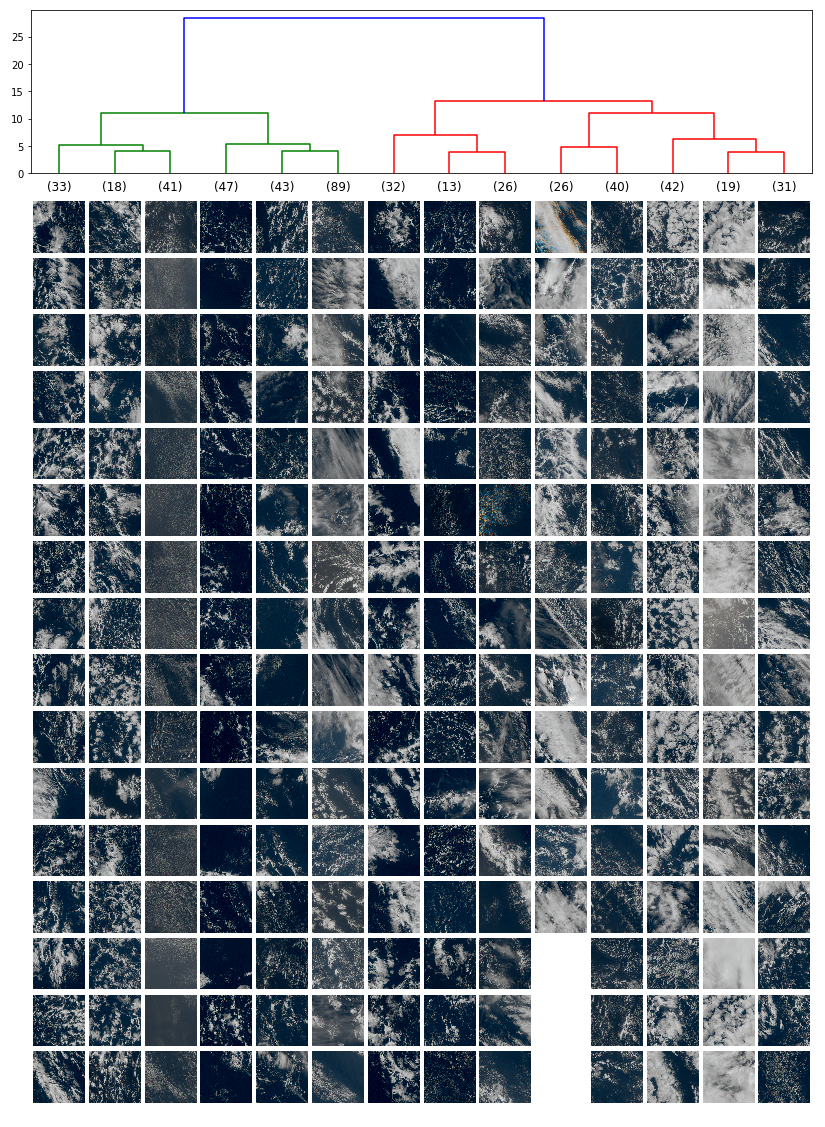

In [18]:
convml_tt.interpretation.plots.dendrogram(encodings, n_samples=16)

# Annotated scatter plots

In [13]:
import xarray as xr

In [14]:
encodings = xr.open_dataarray('encodings_example.nc')

In [15]:
encodings

<xarray.DataArray (tile_id: 500, enc_dim: 100)>
array([[-0.057738,  0.034694,  0.037043, ...,  0.021907,  0.068567, -0.05971 ],
       [-0.045319,  0.017288,  0.187497, ...,  0.074235,  0.093561,  0.025728],
       [ 0.143855, -0.148752, -0.26558 , ..., -0.127735, -0.190605, -0.023842],
       ...,
       [ 0.085761, -0.155954, -0.198646, ..., -0.0581  , -0.084231,  0.017921],
       [ 0.10804 , -0.16091 , -0.213996, ..., -0.089401, -0.108375,  0.04414 ],
       [ 0.104399, -0.143942, -0.224941, ..., -0.084925, -0.124455, -0.006198]],
      dtype=float32)
Coordinates:
  * tile_id  (tile_id) int64 0 1 2 3 4 5 6 7 ... 492 493 494 495 496 497 498 499
  * enc_dim  (enc_dim) int64 0 1 2 3 4 5 6 7 8 9 ... 91 92 93 94 95 96 97 98 99
Attributes:
    tile_used:    anchor
    source_path:  /nfs/a289/earlcd/OneDrive/ML/research/convective_organisati...

In [16]:
import numpy as np
import matplotlib.pyplot as plt

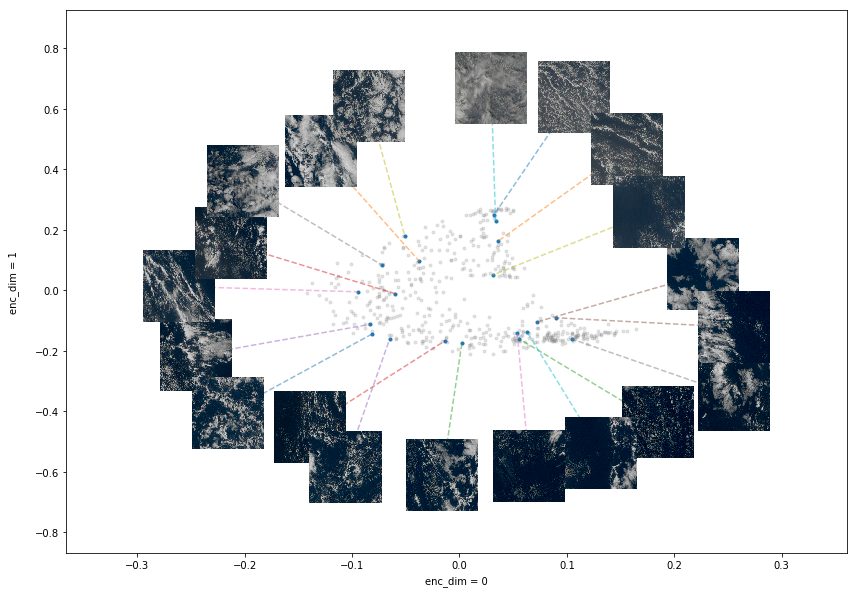

In [17]:
x = encodings.sel(enc_dim=0)
y = encodings.sel(enc_dim=1)
#fig, ax = plt.subplots(figsize=(8,6))
ax = None
convml_tt.interpretation.plots.scatter_annotated(x=x, y=y, points=20, ax=ax)